1. $\nabla r$

Let $c'_k = \dfrac{c_k}{R}$, $d'_k = \dfrac{d_k}{R}$, $x = \dfrac{s}{R}$, $l = \dfrac{L}{R}$

$$
T = \rho\omega^2R^3\int_0^1\left(\sum_{k=1}^{20}d'_k\sin\pi kx\right)^2dx=\frac{\rho\omega^2R^3}{2}\sum_{k=1}^{20}d'^2_k\\
V = C+
\frac{\pi^2\mu R}{2}\sum_{k=1}^{20}\left(c'^2_k+d'^2_k\right) k^2
-2\mu R\int_0^1\sqrt{
\left(l+\pi\sum_{k=1}^{20}c'_k k\cos\pi kx\right)^2 +
\left(\pi\sum_{k=1}^{20}d'_k k\cos\pi kx\right)^2
} dx
$$

Gradient,

$$
\frac{\partial r}{\partial d_k'} = \pi^2\mu R d'_{k'} k'^2
-2\mu R\pi^2\int_0^1 k'\cos\pi k'x\left(\sum_{k=1}^{20}d'_k k\cos\pi kx\right)\sqrt{
\left(l+\pi\sum_{k=1}^{20}c'_k k\cos\pi kx\right)^2 +
\left(\pi\sum_{k=1}^{20}d'_k k\cos\pi kx\right)^2
}^{-1} dx - \rho\omega^2R^3 d'_{k'}\\
\frac{\partial r}{\partial c_k'} = \pi^2\mu R\sum_{k=1}^{20}c'_{k'} k'^2
-2\mu R\pi\int_0^1 k'\cos\pi k'x\left(l+\pi\sum_{k=1}^{20}c'_k k\cos\pi kx\right)\sqrt{
\left(l+\pi\sum_{k=1}^{20}c'_k k\cos\pi kx\right)^2 +
\left(\pi\sum_{k=1}^{20}d'_k k\cos\pi kx\right)^2
}^{-1} dx
$$

2. See [`shape.jl`](shape.jl) for the program.

    See [below](#Plots) for the plots for this and the next question.

3. The results are very similar (minimum values are essentially the same).
    When using different initial values, the algorithm does get stuck sometimes
    though...

In [1]:
using PyPlot

In [2]:
include("shape.jl")

calc_y (generic function with 1 method)

In [3]:
kernel20 = KernelP2{20,Float64}(2, 5, 1, 1, 20)
kernel200 = KernelP2{20,Float64}(2, 5, 1, 1, 200)
kernel2000 = KernelP2{20,Float64}(2, 5, 1, 1, 2000)

opt_kernel20 = OptimIntKernel{40}(kernel20, 0.0, 2.0)
opt_kernel200 = OptimIntKernel{40}(kernel200, 0.0, 2.0)
opt_kernel2000 = OptimIntKernel{40}(kernel2000, 0.0, 2.0)

x0_1 = zeros(40)
x0_2 = zeros(40)
x0_1[21] = 1
x0_2[22] = 0.5

0.5

In [4]:
res20_1 = optimize((x) -> opt_kernel20(x), x0_1, method=:bfgs, ftol=1e-16)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [2.5208228482116217e-10,-0.0427405829637843, ...]
 * Value of Function at Minimum: -3.950247
 * Iterations: 72
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-16: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 272
 * Gradient Call: 272

In [5]:
res20_2 = optimize((x) -> opt_kernel20(x), x0_2, method=:bfgs, ftol=1e-32)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [4.992349781328097e-10,-0.0427405832070925, ...]
 * Value of Function at Minimum: -3.950247
 * Iterations: 114
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 418
 * Gradient Call: 418

In [6]:
res200_1 = optimize((x) -> opt_kernel200(x), x0_1, method=:bfgs, ftol=1e-16)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [-1.352404468211731e-10,-0.042531183326026185, ...]
 * Value of Function at Minimum: -3.417653
 * Iterations: 104
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-16: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 380
 * Gradient Call: 380

In [7]:
res200_2 = optimize((x) -> opt_kernel200(x), x0_2, method=:bfgs, ftol=1e-32)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [4.814384971054235e-11,-0.04253118330757315, ...]
 * Value of Function at Minimum: -3.417653
 * Iterations: 192
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 702
 * Gradient Call: 702

In [8]:
res2000_1 = optimize((x) -> opt_kernel2000(x), x0_1, method=:bfgs, ftol=1e-16)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [3.596483982077271e-10,-0.04248135724150035, ...]
 * Value of Function at Minimum: -3.371024
 * Iterations: 141
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-16: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 520
 * Gradient Call: 520

In [9]:
res2000_2 = optimize((x) -> opt_kernel2000(x), x0_2, method=:bfgs, ftol=1e-32)

Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [0.0,0.0, ...]
 * Minimum: [4.0409614408989506e-8,-0.04248128189759415, ...]
 * Value of Function at Minimum: -3.371024
 * Iterations: 460
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 1658
 * Gradient Call: 1658

#### Plots

In [10]:
plot_ss = linspace(0, 2, 1000)

1000-element LinSpace{Float64}:
 0.0,0.002002,0.004004,0.00600601,0.00800801,…,1.99199,1.99399,1.996,1.998,2.0

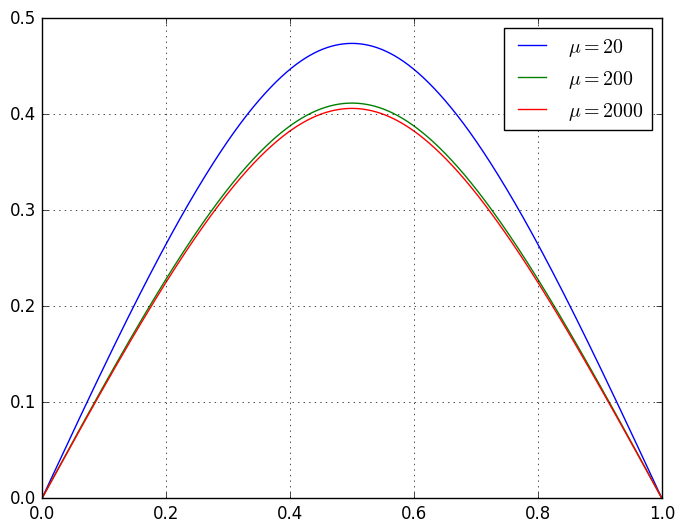

In [11]:
x20_1 = Float64[calc_x(kernel20, s, res20_1.minimum) for s in plot_ss]
y20_1 = Float64[calc_y(kernel20, s, res20_1.minimum) for s in plot_ss]
x200_1 = Float64[calc_x(kernel200, s, res200_1.minimum) for s in plot_ss]
y200_1 = Float64[calc_y(kernel200, s, res200_1.minimum) for s in plot_ss]
x2000_1 = Float64[calc_x(kernel2000, s, res2000_1.minimum) for s in plot_ss]
y2000_1 = Float64[calc_y(kernel2000, s, res2000_1.minimum) for s in plot_ss]

plot(x20_1, y20_1, label="\$\\mu=20\$")
plot(x200_1, y200_1, label="\$\\mu=200\$")
plot(x2000_1, y2000_1, label="\$\\mu=2000\$")

legend()
grid()

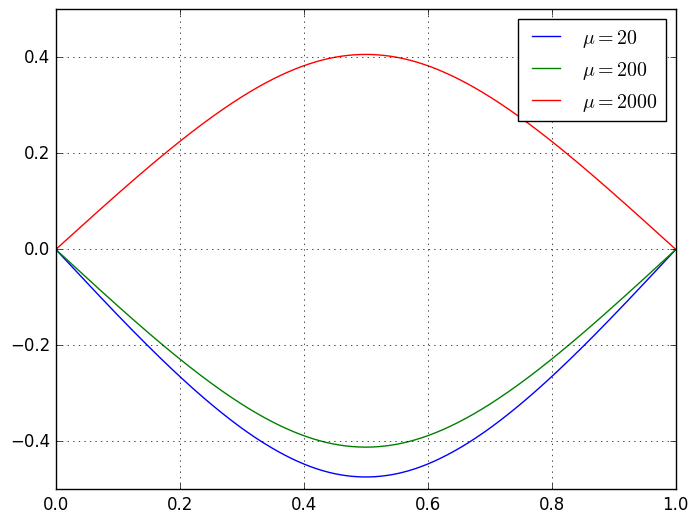

In [12]:
x20_2 = Float64[calc_x(kernel20, s, res20_2.minimum) for s in plot_ss]
y20_2 = Float64[calc_y(kernel20, s, res20_2.minimum) for s in plot_ss]
x200_2 = Float64[calc_x(kernel200, s, res200_2.minimum) for s in plot_ss]
y200_2 = Float64[calc_y(kernel200, s, res200_2.minimum) for s in plot_ss]
x2000_2 = Float64[calc_x(kernel2000, s, res2000_2.minimum) for s in plot_ss]
y2000_2 = Float64[calc_y(kernel2000, s, res2000_2.minimum) for s in plot_ss]

plot(x20_2, y20_2, label="\$\\mu=20\$")
plot(x200_2, y200_2, label="\$\\mu=200\$")
plot(x2000_2, y2000_2, label="\$\\mu=2000\$")

legend()
grid()